### knn(k-nearest neighbor)
k-最近邻算法核心代码

In [30]:
def classify0(inX,dataSet,labels,k):
    
    '''
    knn分类器
    -----------
    inX:测试样本
    dataSet:训练集
    labels:训练标签
    k:距离最近的前k个值
    '''
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX,(dataSetSize,1)) - dataSet
    #tile用于把inX横向或者纵向复制，即把inX扩充成于dataSet相同维度。

    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis = 1)
    distances = sqDistances**0.5
    sorteDistIndicies = distances.argsort()
    #计算距离，新数据每个点和训练集的距离;
    #argsort(),排序并返回原数组索引.
    #[8,2,1,4,5,7]--->index[0:k]---->取k个索引

    classCount = {}
    for i in range(k):
        voteIlabel = labels[sorteDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0)+1
        #遍历，排序后前k个索引，labels[index]--->类别
        #字典get方法，统计类别次数，没有返回0，次数+1
    sortedClassCount = sorted(classCount.items(),
        key = operator.itemgetter(1),reverse =True)
    return sortedClassCount[0][0]

对于上述代码，其实可以拆解成以下2部分更容易理解：
* 首先是计算距离 
* 其次是统计k范围内类别个数

__关于距离的计算,其实距离的选择有很多种，因此产生了许多对knn算法的改进版本：比如距离加权knn等__
___
自己将书上的代码拆成3块便于理解，有几个小区别在于：1.对`字典按值进行排序`，例子用了operator.itemgetter()方法，自己用了字典的`items()`方法.

**代码中的技巧和思路：**1.数组排序后返回索引--`array.argsort()`方法；2.统计某一类别出现的次数，巧妙用了`字典的get()`方法。

In [123]:
def CountDistance(sample,d_train):
	Size = d_train.shape[0]
	diffMat = tile(sample,(Size,1)) - d_train
	sqDiffMat = diffMat**2
	sqDistances = sqDiffMat.sum(axis=1)
	distances = sqDistances**0.5
	dist_index = distances.argsort()
	return dist_index

classCount ={}
def LabelCount(dist_index,k,labels):
	for i in range(k):
		kind = labels[dist_index[i]]
		classCount[kind] = classCount.get(kind,0)+1
	result = sorted(classCount.items(),key = lambda x:x[1],reverse=True)
	return result[0][0]


def knn(sample,d_train,k,labels):
	dist_index = CountDistance(sample,d_train)
	result = LabelCount(dist_index,k,labels)
	return result

In [124]:
CountDistance([1,1],group)

array([1, 0, 3, 2])

In [125]:
knn([0,1],group,4,labels)

'B'

## 将txt文件读入到数组中

In [31]:
import numpy as np

filename = 'datingTestSet.txt'
path = '/Users/tony/github/machine-learning-in-action/k-Nearest Neighbor/'+filename

def load_txt(filename):
    f = open(filename,'r')
    #按行读取，返回list
    mid= f.readlines()
    mid2 = [x.strip('\n').split('\t') for x in mid]
    arr = np.array(mid2)
    labels = arr[:,3]
    groups = np.array(arr[:,0:3],dtype=float)
    return groups,labels

In [32]:
G,L = load_txt(path)

## 分析数据
>需要补充matplotlib的技能，要学会简单的画图，逻辑，修改坐标轴以及多图展示

In [73]:
import matplotlib.pyplot as plt

def plot(dt,labels):
    plt.figure()
    a1 = np.char.replace(labels,'largeDoses','r')
    a2 = np.char.replace(a1,'didntLike','b')
    a3 = np.char.replace(a2,'smallDoses','g')
    c = a3
    plt.scatter(dt[:,0],dt[:,1],c=a3,marker='o',alpha=0.5)
    plt.xlabel('pilot distance')
    plt.ylabel('game time')
    plt.legend(loc =2 ,)
    plt.show()

No handles with labels found to put in legend.


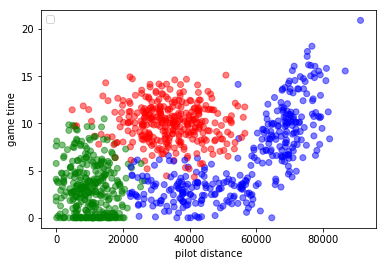

In [199]:
plot(G,L)

# 书中源码

In [ ]:
def datingClassTest():
    hoRatio = 0.10      #hold out 10%,留作test集合
    datingDataMat,datingLabels = file2matrix('k-Nearest Neighbor/datingTestSet2.txt')       #load data setfrom file
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio) #前面的numTestVecs作为测试集，后面的作为训练集
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:] 
                                     ,datingLabels[numTestVecs:m],3)
        #print "the classifier came back with: %d, the real answer is: %d" % (classifierResult, datingLabels[i])
        if (classifierResult != datingLabels[i]): errorCount += 1.0
    print "the total error rate is: %f" % (errorCount/float(numTestVecs))
    print errorCount

datingClassTest()

## 准备数据
归一化数值:0-1归一化,`new = (old - min) / (max - min)`
* 使用现成的sklearn包更为便捷
因为已经得到现成的特征向量，所以直接归一化就行了
* 虽然也可以写一个函数来实现归一化，但是效率不高。

In [34]:
G_normalized = preprocessing.normalize(G, norm='l2')

In [35]:
G_normalized

array([[9.99999979e-01, 2.03494033e-04, 2.33126095e-05],
       [9.99999871e-01, 4.93751248e-04, 1.15537257e-04],
       [9.99999998e-01, 5.53458850e-05, 3.09044986e-05],
       ...,
       [9.99999919e-01, 4.00756393e-04, 3.26106088e-05],
       [9.99999982e-01, 1.89863604e-04, 1.51326097e-05],
       [9.99999983e-01, 1.80144911e-04, 3.04510359e-05]])

## 测试算法
用错误率来衡量分类结果
* 涉及到训练集和测试集的划分：
    * 关于数据划分，可以直接用sklearn的`train_test_split`,在`model_selection`下。__(但这样划分，缺少验证集)__
        * 其中`random_state`代表`随机种子`：其实就是该组随机数的编号，在需要重复试验的时候，保证得到一组一样的随机数。比如你每次都填1，其他参数一样的情况下你得到的随机数组是一样的。但填0或不填，每次都会不一样。
        * 随机数的产生取决于种子，随机数和种子之间的关系遵从以下两个规则：种子不同，产生不同的随机数；种子相同，即使实例不同也产生相同的随机数。
    * 每一个测试样本带入分类器，查看分类结果，判断并记录下对错
    * 可以使用交叉验证和留出法，区别在于

In [36]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
'''
1.数据集划分,一次划分，对其中每个样本进行测试;
2.计算错误率，比较每次分类结果
'''
#划分数据集，以及数据归一化
X_train,X_test,y_train,y_test = train_test_split(G_normalized,L,test_size = 0.1,random_state = 21)


#基本分类情况classify0(X_test[0],X_train,y_train,20)
error_rate = {'true':0,'false':0}
y_predict = []
for i in range(100):
    result = classify0(X_test[i],X_train,y_train,20)
    y_predict.append(result)
    print('the classify result is : %s , the real answer is : %s'%(result,y_test[i]))
    if result==y_test[i]:
        error_rate['true'] += 1
    else:
        error_rate['false'] += 1
error_rate['false']/100

the classify result is : didntLike , the real answer is : didntLike
the classify result is : largeDoses , the real answer is : largeDoses
the classify result is : largeDoses , the real answer is : smallDoses
the classify result is : largeDoses , the real answer is : largeDoses
the classify result is : didntLike , the real answer is : didntLike
the classify result is : largeDoses , the real answer is : smallDoses
the classify result is : largeDoses , the real answer is : largeDoses
the classify result is : didntLike , the real answer is : didntLike
the classify result is : largeDoses , the real answer is : largeDoses
the classify result is : largeDoses , the real answer is : smallDoses
the classify result is : smallDoses , the real answer is : smallDoses
the classify result is : largeDoses , the real answer is : largeDoses
the classify result is : didntLike , the real answer is : didntLike
the classify result is : largeDoses , the real answer is : smallDoses
the classify result is : did

0.2

### 需要将分类器测试结果整理成完整的函数
* 以下是用于测试分类结果的函数，输出为分类错误率。
___
这个结果仅对于`一次样本划分`的数据集而言，而且`k值`选择仅为1次，所以这个函数里面的参数可以进一步改变，

`<调参>`，来查看不同数据划分和k值选择情况下分类结果是怎么样的。

In [46]:
def datingTest(X_test,X_train,y_train,test_size,k):
    '''
    knn测试
    test_size:测试集大小
    k:距离升序排序的前k个值
    ...
    剩下的是划分的数据集
    output:分类错误率
    '''
    error_rate = {'true':0,'false':0}
    y_predict = []
    for i in range(test_size):
        result = classify0(X_test[i],X_train,y_train,20)
        y_predict.append(result)
        print('the classify result is : %s , the real answer is : %s'%(result,y_test[i]))
        if result==y_test[i]:
            error_rate['true'] += 1
        else:
            error_rate['false'] += 1
    er_rate = error_rate['false']/100
    return print('the error rate is :%f'%er_rate)

In [47]:
datingTest(X_test,X_train,y_train,test_size=100,k=10)

the classify result is : didntLike , the real answer is : didntLike
the classify result is : largeDoses , the real answer is : largeDoses
the classify result is : largeDoses , the real answer is : smallDoses
the classify result is : largeDoses , the real answer is : largeDoses
the classify result is : didntLike , the real answer is : didntLike
the classify result is : largeDoses , the real answer is : smallDoses
the classify result is : largeDoses , the real answer is : largeDoses
the classify result is : didntLike , the real answer is : didntLike
the classify result is : largeDoses , the real answer is : largeDoses
the classify result is : largeDoses , the real answer is : smallDoses
the classify result is : smallDoses , the real answer is : smallDoses
the classify result is : largeDoses , the real answer is : largeDoses
the classify result is : didntLike , the real answer is : didntLike
the classify result is : largeDoses , the real answer is : smallDoses
the classify result is : did

### 使用算法
分类器测试结果表现良好，可以用来使用。
___
关于判断约会对象的小程序基本功能和用法如下：
    * 根据输入的3条属性，来给出这个人是否值得约会
    * 在输入测试数据时，记得要对其进行`归一化`

In [39]:
ice =float(input('ice cream consumed per year:'))
travel = float(input('travel distance per year:'))
game = float(input('game time per year:'))
person = np.array([travel,game,ice])
#需要归一化
Mx = np.max(G)
Mi = np.min(G)
Rg = Mx-Mi
person_norm = (person-Mi)/Rg
classify0(person_norm,X_train,y_train,20)

ice cream consumed per year:10
travel distance per year:10
game time per year:10


'smallDoses'

### 约会决策模型

In [40]:
def personDecision():
    ice =float(input('ice cream consumed per year:'))
    travel = float(input('travel distance per year:'))
    game = float(input('game time per year:'))
    person = np.array([travel,game,ice]).reshape(1,-1)
    #需要归一化
    person_norm = preprocessing.normalize(person, norm='l2')
    decision = classify0(person_norm,X_train,y_train,20)
    print('You might have %s with this guy.'%decision)
    return 

In [41]:
personDecision()

ice cream consumed per year:10
travel distance per year:101
game time per year:10
You might have smallDoses with this guy.


### Knn代码整合
代码内容包括：
* 基础模型分类器
* 数据集划分并归一化

中间的一些步骤可以优化，比如基础分类器距离的计算，可以用矩阵进行。

In [49]:
import numpy as np
from numpy import *
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import operator

def classify0(inX,dataSet,labels,k):
    
    '''
    knn分类器
    -----------
    inX:测试样本
    dataSet:训练集
    labels:训练标签
    k:距离最近的前k个值
    '''
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX,(dataSetSize,1)) - dataSet
    #tile用于把inX横向或者纵向复制，即把inX扩充成于dataSet相同维度。

    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis = 1)
    distances = sqDistances**0.5
    sorteDistIndicies = distances.argsort()
    #计算距离，新数据每个点和训练集的距离;
    #argsort(),排序并返回原数组索引.
    #[8,2,1,4,5,7]--->index[0:k]---->取k个索引

    classCount = {}
    for i in range(k):
        voteIlabel = labels[sorteDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0)+1
        #遍历，排序后前k个索引，labels[index]--->类别
        #字典get方法，统计类别次数，没有返回0，次数+1
    sortedClassCount = sorted(classCount.items(),
        key = operator.itemgetter(1),reverse =True)
    return sortedClassCount[0][0]


'''
最终使用的约会对象分类模型
'''
def personDecision():
    '''
    约会对象筛选模型：
    output:根据这个人的习惯:ice,travel,game，初步判断是否值得约会
    '''
    ice =float(input('ice cream consumed per year:'))
    travel = float(input('travel distance per year:'))
    game = float(input('game time per year:'))
    person = np.array([travel,game,ice]).reshape(1,-1)
    #需要归一化
    person_norm = preprocessing.normalize(person, norm='l2')
    decision = classify0(person_norm,X_train,y_train,20)
    print('You might have %s with this guy.'%decision)
    return 


def load_txt(filename):
    '''
    读取数据集
    '''
    f = open(filename,'r')
    #按行读取，返回list
    mid= f.readlines()
    mid2 = [x.strip('\n').split('\t') for x in mid]
    arr = np.array(mid2)
    labels = arr[:,3]
    groups = np.array(arr[:,0:3],dtype=float)
    return groups,labels


if __name__ =='__main__':
    filename = 'datingTestSet.txt'
    path = '/Users/tony/github/machine-learning-in-action/k-Nearest Neighbor/'+filename
    G,L = load_txt(filename)
    #归一化
    G_normalized = preprocessing.normalize(G, norm='l2')
    #划分数据集
    X_train,X_test,y_train,y_test = train_test_split(G_normalized,L,test_size = 0.1,random_state = 21)
    personDecision()    

ice cream consumed per year:20
travel distance per year:1000
game time per year:20
You might have smallDoses with this guy.


In [43]:
personDecision()

ice cream consumed per year:10
travel distance per year:20
game time per year:30
You might have smallDoses with this guy.


### 调参过程，也是模型选择和评估过程
* 1.多种数据集划分方式-数据集大小不同
* 2.在某种方式下k值的不同选取
___
**需要经过以上两个步骤，才能确定，最佳的数据集划分以及k值选取。**

#### 交叉验证(cross validation)
该方法虽然计算代价很高，但是它不会浪费太多的数据（如固定任意测试集的情况一样）， 在处理样本数据集较少的问题（例如，逆向推理）时比较有优势。

# 这里放调参过程

## 手写识别系统
### 常规步骤
1. 收集数据
2. 准备数据
3. 分析数据
4. 训练算法-knn不适用
5. 测试算法
6. 使用算法

### 准备数据
因为数据集已经有了，需要做的是将其读取到python中

查看数据发现，数据是以txt文件保存的，每个文件都是数字排列组成的图像，文件名是这组数据代表的数字以及这个数字的样本编号

需要做的是将整个文件作为一个向量存储。涉及到矩阵的向量化处理。
___
思路是：
* 将每个文件读取成一个array
* 记录每个文件的label信息，根据文件名
* 由于已经分好了，不需要对数据集进行划分

In [161]:
from numpy import *
import operator

In [127]:
def read_file(file,path):
    '''
    将图像文件读取成数组
    file:文件名
    output:该文件的数组向量
    '''
    PT = path+file
    with open(PT,'r') as f:
        txt = f.readlines()
        mid_str = list(map(lambda x:x.strip('\n'),txt))
        arr = []
        for i in range(32):
            mid_int = list(map(lambda x:int(x),mid_str[i]))
            arr.extend(mid_int)
        return np.array(arr)

In [130]:
read_file('0_0.txt',path='./digits/trainingDigits/')

array([0, 0, 0, ..., 0, 0, 0])

In [136]:
import os
trainlist = os.listdir('digits/trainingDigits')
labels = (list(map(lambda x:x.split('_')[0],trainlist)))
group = list(map(lambda x:read_file(file = x,path='./digits/trainingDigits/'),trainlist))
testlist = os.listdir('digits/testDigits')
labels_test =  list(map(lambda x:x.split('_')[0],testlist))
group_test = list(map(lambda x:read_file(file = x,path='./digits/testDigits/'),testlist))

In [149]:
def changeTodataSet(path):
    '''
    批量读取文件，成为数组，组成数据集
    '''
    dataList = os.listdir(path)
    labels = np.array(list(map(lambda x:x.split('_')[0],dataList)))
    group = np.array(list(map(lambda x:read_file(file = x,path=path),dataList)))
    return group,labels    

In [159]:
group_train,labels_train = changeTodataSet('./digits/trainingDigits/')
group_text,labels_text = changeTodataSet('./digits/testDigits/')

In [164]:
classify0(group_test[2],group_train,labels_train,10)

'3'

## 手写识别模型代码汇总
* 主要包括：knn分类器
* 文件读取函数`read_file()`
* 图像转数组函数`changeTodataSet()`

In [2]:
from numpy import *
import numpy as np
import operator
import os

In [5]:
'''
手写识别模型
'''

def classify0(inX,dataSet,labels,k):
    
    '''
    knn分类器
    -----------
    inX:测试样本
    dataSet:训练集
    labels:训练标签
    k:距离最近的前k个值
    '''
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX,(dataSetSize,1)) - dataSet
    #tile用于把inX横向或者纵向复制，即把inX扩充成于dataSet相同维度。

    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis = 1)
    distances = sqDistances**0.5
    sorteDistIndicies = distances.argsort()
    #计算距离，新数据每个点和训练集的距离;
    #argsort(),排序并返回原数组索引.
    #[8,2,1,4,5,7]--->index[0:k]---->取k个索引

    classCount = {}
    for i in range(k):
        voteIlabel = labels[sorteDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0)+1
        #遍历，排序后前k个索引，labels[index]--->类别
        #字典get方法，统计类别次数，没有返回0，次数+1
    sortedClassCount = sorted(classCount.items(),
        key = operator.itemgetter(1),reverse =True)
    return sortedClassCount[0][0]


def read_file(file,path):
    '''
    将图像文件读取成数组
    file:文件名
    output:该文件的数组向量
    '''
    PT = path+file
    with open(PT,'r') as f:
        txt = f.readlines()
        mid_str = list(map(lambda x:x.strip('\n'),txt))
        arr = []
        for i in range(32):
            mid_int = list(map(lambda x:int(x),mid_str[i]))
            arr.extend(mid_int)
        return array(arr)
    
def changeTodataSet(path):
    '''
    批量读取文件，成为数组，组成数据集
    '''
    dataList = os.listdir(path)
    labels = array(list(map(lambda x:x.split('_')[0],dataList)))
    group = array(list(map(lambda x:read_file(file = x,path=path),dataList)))
    return group,labels    

def HandwritingRecgnize():
    '''
    手写识别模型
    output:识别结果，错误数量，识别错误率。
    '''
    num = len(group_text)
    error = 0
    for i in range(num):
        predict_num = classify0(group_text[i],group_train,labels_train,20)
        real_num = labels_text[i]
        print('the predict num is : %s'%predict_num,'the real num is : %s'%real_num)
        if predict_num !=real_num:error += 1
    print('predict error time is :%d'%error)
    print('total error rate is :%f'%(error/num)) 
    return

if __name__ == '__main__':
    group_train,labels_train = changeTodataSet('./digits/trainingDigits/')
    group_text,labels_text = changeTodataSet('./digits/testDigits/')
    HandwritingRecgnize()

the predict num is : 4 the real num is : 4
the predict num is : 4 the real num is : 4
the predict num is : 3 the real num is : 3
the predict num is : 9 the real num is : 9
the predict num is : 0 the real num is : 0
the predict num is : 0 the real num is : 0
the predict num is : 9 the real num is : 9
the predict num is : 7 the real num is : 7
the predict num is : 7 the real num is : 7
the predict num is : 0 the real num is : 0
the predict num is : 3 the real num is : 3
the predict num is : 2 the real num is : 2
the predict num is : 2 the real num is : 2
the predict num is : 5 the real num is : 5
the predict num is : 5 the real num is : 5
the predict num is : 5 the real num is : 5
the predict num is : 2 the real num is : 2
the predict num is : 6 the real num is : 6
the predict num is : 6 the real num is : 6
the predict num is : 9 the real num is : 9
the predict num is : 8 the real num is : 8
the predict num is : 1 the real num is : 8
the predict num is : 1 the real num is : 1
the predict

the predict num is : 7 the real num is : 7
the predict num is : 0 the real num is : 0
the predict num is : 9 the real num is : 9
the predict num is : 0 the real num is : 0
the predict num is : 0 the real num is : 0
the predict num is : 9 the real num is : 9
the predict num is : 7 the real num is : 7
the predict num is : 4 the real num is : 4
the predict num is : 7 the real num is : 7
the predict num is : 4 the real num is : 4
the predict num is : 4 the real num is : 4
the predict num is : 3 the real num is : 3
the predict num is : 4 the real num is : 4
the predict num is : 4 the real num is : 4
the predict num is : 3 the real num is : 3
the predict num is : 3 the real num is : 3
the predict num is : 4 the real num is : 4
the predict num is : 8 the real num is : 8
the predict num is : 3 the real num is : 3
the predict num is : 4 the real num is : 4
the predict num is : 7 the real num is : 4
the predict num is : 0 the real num is : 0
the predict num is : 7 the real num is : 7
the predict

the predict num is : 1 the real num is : 1
the predict num is : 1 the real num is : 1
the predict num is : 6 the real num is : 6
the predict num is : 1 the real num is : 8
the predict num is : 2 the real num is : 2
the predict num is : 2 the real num is : 2
the predict num is : 5 the real num is : 5
the predict num is : 5 the real num is : 5
the predict num is : 2 the real num is : 2
the predict num is : 4 the real num is : 4
the predict num is : 0 the real num is : 0
the predict num is : 7 the real num is : 7
the predict num is : 9 the real num is : 9
the predict num is : 0 the real num is : 0
the predict num is : 9 the real num is : 9
the predict num is : 7 the real num is : 7
the predict num is : 4 the real num is : 4
the predict num is : 4 the real num is : 4
the predict num is : 4 the real num is : 4
the predict num is : 4 the real num is : 4
the predict num is : 3 the real num is : 3
the predict num is : 3 the real num is : 3
the predict num is : 8 the real num is : 8
the predict

the predict num is : 7 the real num is : 7
the predict num is : 6 the real num is : 6
the predict num is : 4 the real num is : 4
the predict num is : 4 the real num is : 4
the predict num is : 4 the real num is : 4
the predict num is : 3 the real num is : 3
the predict num is : 3 the real num is : 3
the predict num is : 3 the real num is : 3
the predict num is : 3 the real num is : 3
the predict num is : 4 the real num is : 4
the predict num is : 4 the real num is : 4
the predict num is : 3 the real num is : 3
the predict num is : 4 the real num is : 4
the predict num is : 6 the real num is : 6
the predict num is : 7 the real num is : 7
the predict num is : 0 the real num is : 0
the predict num is : 7 the real num is : 7
the predict num is : 9 the real num is : 9
the predict num is : 9 the real num is : 9
the predict num is : 0 the real num is : 0
the predict num is : 9 the real num is : 9
the predict num is : 4 the real num is : 4
the predict num is : 5 the real num is : 5
the predict

the predict num is : 3 the real num is : 3
the predict num is : 4 the real num is : 4
the predict num is : 3 the real num is : 3
the predict num is : 5 the real num is : 5
the predict num is : 4 the real num is : 4
the predict num is : 3 the real num is : 3
the predict num is : 1 the real num is : 1
the predict num is : 7 the real num is : 7
the predict num is : 9 the real num is : 9
the predict num is : 7 the real num is : 7
the predict num is : 0 the real num is : 0
the predict num is : 0 the real num is : 0
the predict num is : 7 the real num is : 7
the predict num is : 9 the real num is : 9
the predict num is : 9 the real num is : 9
the predict num is : 4 the real num is : 4
the predict num is : 0 the real num is : 0
the predict num is : 7 the real num is : 7
the predict num is : 3 the real num is : 3
the predict num is : 9 the real num is : 9
the predict num is : 5 the real num is : 5
the predict num is : 2 the real num is : 2
the predict num is : 5 the real num is : 5
the predict

## 尝试使用sklearn来做
`class sklearn.neighbors.KNeighborsClassifier`(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=None, **kwargs)¶

[sklearn官方手册](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

**从下面的结果可以看出**
* `KNeighborsClassifier`是一个knn的分类器，在设置好k值后确定分类模型
* `neigh.fit`用训练样本的数据和标签去拟合这个模型
* `neigh.predict`预测分类结果
* `neigh.score`提供测试集计算模型分类精度

**整理代码**
通过调用sklearn的api可以得到更简洁的代码

In [52]:
from numpy import *
import numpy as np
import operator
import os
from sklearn.neighbors import KNeighborsClassifier

def read_file(file,path):
    '''
    将图像文件读取成数组
    file:文件名
    output:该文件的数组向量
    '''
    PT = path+file
    with open(PT,'r') as f:
        txt = f.readlines()
        mid_str = list(map(lambda x:x.strip('\n'),txt))
        arr = []
        for i in range(32):
            mid_int = list(map(lambda x:int(x),mid_str[i]))
            arr.extend(mid_int)
        return array(arr)
    
def changeTodataSet(path):
    '''
    批量读取文件，成为数组，组成数据集
    '''
    dataList = os.listdir(path)
    labels = array(list(map(lambda x:x.split('_')[0],dataList)))
    group = array(list(map(lambda x:read_file(file = x,path=path),dataList)))
    return group,labels    


def sk_knn():
    '''
    用sklearn在做knn分类
    
    '''
    neigh = KNeighborsClassifier(n_neighbors=20)
    neigh.fit(group_train,labels_train)
    result = neigh.predict(group_text)
    accuracy = neigh.score(group_text,labels_text)
    return result,accuracy

if __name__ == '__main__':
    group_train,labels_train = changeTodataSet('./digits/trainingDigits/')
    group_text,labels_text = changeTodataSet('./digits/testDigits/')
    result,accuracy = sk_knn()    
    num = len(result)
    for i in range(num):
        predict_num = result[i]
        real_num = labels_text[i]
        print('the predict num is :%s'%predict_num,'the real num is :%s'%real_num)
    print('the accuracy of this model is :%f'%accuracy)

the predict num is :4 the real num is :4
the predict num is :4 the real num is :4
the predict num is :3 the real num is :3
the predict num is :9 the real num is :9
the predict num is :0 the real num is :0
the predict num is :0 the real num is :0
the predict num is :9 the real num is :9
the predict num is :7 the real num is :7
the predict num is :7 the real num is :7
the predict num is :0 the real num is :0
the predict num is :3 the real num is :3
the predict num is :2 the real num is :2
the predict num is :2 the real num is :2
the predict num is :5 the real num is :5
the predict num is :5 the real num is :5
the predict num is :5 the real num is :5
the predict num is :2 the real num is :2
the predict num is :6 the real num is :6
the predict num is :6 the real num is :6
the predict num is :9 the real num is :9
the predict num is :8 the real num is :8
the predict num is :1 the real num is :8
the predict num is :1 the real num is :1
the predict num is :1 the real num is :8
the predict num 

### 小结
通过2个例子的练习：约会对象分类、手写识别分类。发现knn算法存在一些问题：

* 算法核心在于计算测试样本与训练集所有样本之间的距离
    * 首先对于`样本量的需求极大`，需要足够多的训练样本才能保证模型的精度；
    * 其次对于大数据集`计算开销巨大`，非常耗时间；
    * 第三，关于`k值选取`，需要人工调参，不同k值带来的分类结果不尽相同，同时，knn判别的`距离`也有多种，比如3个点，A,B1,B2。测试数据点离A更近，而离B更远，选择不同距离判断方式带来的分类情况不同。
   
* 在算法实现过程中的一些注意事项
    * 数据集导入过程中，需要将其转化为数组的形式(特征向量)，便于计算机处理；
    * 在`准备数据`的过程中，需要对数据进行归一化、去除异常值、填补缺失值等一系列操作，这一过程可以统称为特征工程(虽然这两个例子的数据都是干净的，无需太多处理)；
    * `测试算法`过程中涉及到模型评估以及最终模型的选择，需要涉及到数据集划分、调参等工作；
    * 需要熟悉`numpy`、`sklearn`等库等操作，可以极大提高工作效率减少代码量，做到有的放矢有重点的将时间花在其他重要的方面。